## Import TensorFlow and other necessary libraries:
Before we start with anything we need tools and these libraries gives us the required tools

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

#DATA
Import the apporpriate data
Here in our example the we are importing the dataset from our google drive

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Path of our dataset

In [3]:

# Define the path to your dataset on Google Drive
data_dir = '/content/gdrive/MyDrive/Train'

#Load the dataset and split the dataset into 2 part, one for training and other for validation

# Check the imported dataset by displaying a sample from the dataset

In [4]:
# Load the dataset from Google Drive
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the dataset from Google Drive with validation split
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training',  # Specify 'training' for the training set
    seed=42  # Set a seed for reproducibility
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation',  # Specify 'validation' for the validation set
    seed=42  # Set the same seed as for the training set
)

# Check the number of samples in the training and validation sets
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")


Found 341 images belonging to 3 classes.
Found 85 images belonging to 3 classes.
Number of training samples: 341
Number of validation samples: 85


#Model
Now we have the dataset, lets build a simple 5 layer CNN Model. Here we will use the Sequential model from Keras Library

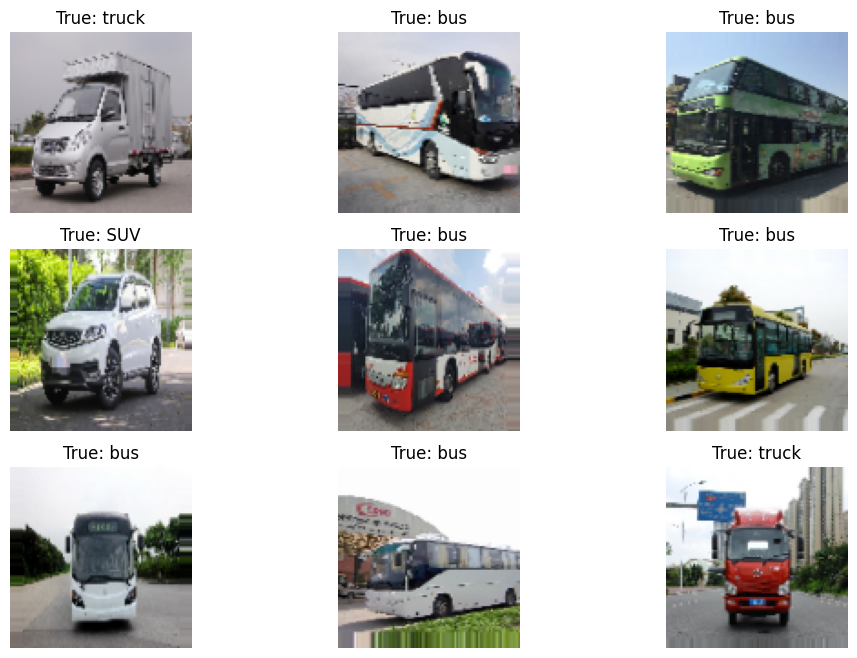

In [5]:
# Step 2: Display a sample of the dataset
sample_images, sample_labels = next(train_generator)

def plot_images(images, labels):
    class_labels = list(train_generator.class_indices.keys())
    plt.figure(figsize=(12, 8))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[np.argmax(labels[i])]
        plt.title(f'True: {true_label}')
        plt.axis('off')
    plt.show()

plot_images(sample_images, sample_labels)

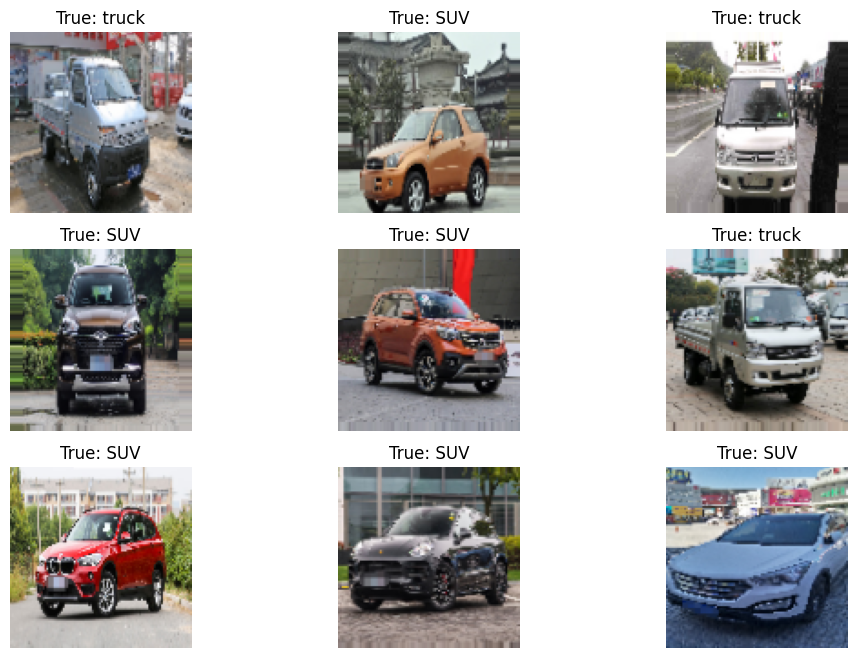

In [6]:
# Step 2: Display a sample of the dataset
sample_images, sample_labels = next(val_generator)

def plot_images(images, labels):
    class_labels = list(train_generator.class_indices.keys())
    plt.figure(figsize=(12, 8))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[np.argmax(labels[i])]
        plt.title(f'True: {true_label}')
        plt.axis('off')
    plt.show()

plot_images(sample_images, sample_labels)

#Training
Now lets feed this data to our model and make it learn to understand the pattern between the 3 classes

In [7]:
# Step 4: Build the Keras model
img_height, img_width = 100, 100
num_classes = len(train_generator.class_indices)  # Assuming train_generator is already defined

# Build the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),  # Added batch normalization

    # Convolutional block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),  # Added batch normalization

    # Convolutional block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),  # Added batch normalization

    # Additional convolutional block for more depth
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),  # Added batch normalization

    # Flattening the feature map
    layers.GlobalAveragePooling2D(),  # Replaced Flatten with GlobalAveragePooling2D

    # Fully connected layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(num_classes, activation='softmax')  # Added softmax activation for multi-class output
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0

In [16]:
# Step 5: Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
11/11 [==============================] - 34s 3s/step - loss: 1.4996 - accuracy: 0.7155 - val_loss: 7.1358 - val_accuracy: 0.3294
Epoch 2/3
11/11 [==============================] - 26s 2s/step - loss: 0.6122 - accuracy: 0.8094 - val_loss: 9.9201 - val_accuracy: 0.3294
Epoch 3/3
11/11 [==============================] - 24s 2s/step - loss: 0.5540 - accuracy: 0.8328 - val_loss: 10.5478 - val_accuracy: 0.3294


In [17]:
# Step 4: Build the Keras model
img_height, img_width = 100, 100
num_classes = len(train_generator.class_indices)

model = models.Sequential([
    # Preprocessing
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Feature extraction (increased depth and complexity)
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Feature transformation (dropout for regularization)
    layers.Flatten(),
    layers.Dropout(0.2),  # Introduce dropout to prevent overfitting

    # Classification (increased units for better representation)
    layers.Dense(512, activation='relu'),  # More units in the first dense layer
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Output layer for 3 classes
])

**Lets Test If Our model is trained well or not**

1/1 [==============================] - 0s 155ms/step


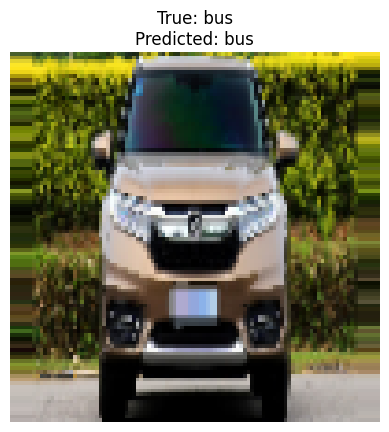

In [18]:
# Step 6: Function to test on any random image from the dataset
def test_on_random_image(model, data_generator):
    random_image, random_label = next(data_generator)
    random_image = np.expand_dims(random_image[1], axis=0)  # Take the first image from the batch
    prediction = model.predict(random_image)

    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[np.argmax(prediction)]
    true_label = class_labels[np.argmax(random_label[0])]

    plt.imshow(random_image[0])
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Test on a random image from the validation set
test_on_random_image(model, val_generator)



1/1 [==============================] - 0s 31ms/step
Predicted label: bus


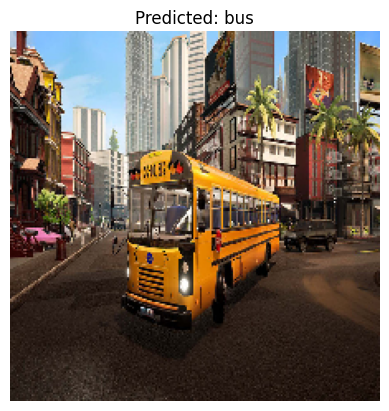

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import requests
from io import BytesIO
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Function to load and preprocess an image from URL
def load_and_preprocess_image(url):
    response = requests.get(url)
    img = load_img(BytesIO(response.content), target_size=(100, 100))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# URL of the image you want to test
image_url = 'https://www.astragon.com/fileadmin/_processed_/e/1/csm_64066C15_Bus_Simulator_21_Next_Stop_School_Bus_Extension_Screenshot3_f72a98e0e1.jpg'

# Load and preprocess the image
test_image = load_and_preprocess_image(image_url)

# Make predictions using the model
predictions = model.predict(test_image)

# Decode and print the predictions
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[np.argmax(predictions)]
print(f'Predicted label: {predicted_label}')

# Display the image
plt.imshow(image.load_img(BytesIO(requests.get(image_url).content), target_size=(224, 224)))
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()


Deep Leaening
pytorch/tensorflow
CV/Image P


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import (
    EfficientNetB0,
    ResNet50,
    VGG16,
    Xception,
    DenseNet121,
)
from tensorflow.keras.layers import (
    Flatten,
    Dense,
    Input,
    GlobalAveragePooling2D,
)
from tensorflow.keras.models import Model

# Import libraries for data loading and preprocessing (adjust based on your setup)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
def preprocess_image(image, img_height, img_width):
    image = tf.image.resize(image, (img_height, img_width))  # Resize
    image = image / 255.0  # Normalize pixel values
    return image


In [22]:
model1=EfficientNetB0

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=1)

11/11 [==============================] - 30s 3s/step - loss: 1.1145 - accuracy: 0.7185 - val_loss: 14.7332 - val_accuracy: 0.3412
